In [1]:
import pandas as pd 
import jieba

df = pd.read_csv("articles_of_ Toyota.csv").astype(str)


In [2]:
df

board                                   article_sub article_id  \
0       Toyota                                 現在買車好還是年底買好呢？    6152938   
1       Toyota                                        汽車防撞邊條    6152953   
2       Toyota              2021 Toyota Corolla Sport 最大變動之處    6153383   
3       Toyota                                      17年 vios    6152067   
4       Toyota                   [活動] 2020 RAV4 DAY 第一屆全國大會師    6152599   
...        ...                                           ...        ...   
38263   Toyota                                 Altis是不是要小改款了    6153691   
38264   Toyota                            Altis引擎故障燈 抖動 更換考爾    6159910   
38265   Toyota  [間諜照] 臺灣環保標章露餡，國產Toyota Corolla Cross無偽裝首度現身    6154364   
38266   Toyota     【採訪】Toyota 小改款 Hilux 145 萬元正式上市，猛漢皮卡全面進化！    6153611   
38267   Toyota                      2019 外媒測試 RAV4 這台真不是普通的神    6156553   

                                               main_link viewed  \
0      https://www.mobile01.com/topicdetail.php?f=264...   2277   
1      https://www.mobile01.com/topicdetail.php?f=264...   4422   
2      https://www.mobile01.com/topicdetail.php?f=264...   1606   
3      https://www.mobile01.com/topicdetail.php?f=264...   1089   
4      https://www.mobile01.com/topicdetail.php?f=264...   7612   
...                                                  ...    ...   
38263  https://www.mobile01.com/topicdetail.php?f=264...  14212   
38264  https://www.mobile01.com/topicdetail.php?f=264...  18084   
38265  https://www.mobile01.com/topicdetail.php?f=264...  31262   
38266  https://www.mobile01.com/topicdetail.php?f=264...  26214   
38267  https://www.mobile01.com/topicdetail.php?f=264...  44253   

              timestamp                                       main_content  \
0      2020-07-28 21:30  昨天心血來潮去看了altis油電版空車折價就8萬真的心動，但是礙於白色車已經沒了😓😓。雖然也...   
1      2020-07-28 21:48  半年前加裝防撞邊條，結果今天去洗車鍍膜保養，拆下來時老闆說因嚴重藏汙納垢（邊條裡面容易留水（...   
2      2020-07-29 12:54  這兩天看到不少車媒開始丟出2021ToyotaCorollaSport的新車影片這間媒體膽子...   
3      2020-07-27 22:47                      有人能介紹台中或彰化安裝安卓機的車廠嗎車是2017vios   
4      2020-07-28 14:37  RAV4DAY大會師開跑瞜!!!親愛的RAV45代車友們我們將在今年2020/9/19（六）...   
...                 ...                                                ...   
38263  2020-07-29 20:05  最近看altis感覺殺很兇除了競賽月以外會不會是明年altis就要小改款趕快清庫存或是幫CC...   
38264  2020-08-07 10:27  前些日子已10年14萬公里的10.5代altis停等紅燈時突然車身頓了一下，引擎故障燈亮起接...   
38265  2020-07-30 17:36  各式間諜照滿天飛啊！！！第四季就快到了，大家再等等　--------於2020年7月9日在泰...   
38266  2020-07-29 17:42  Toyota原廠於今年六月所推出的小改款Hilux於今日正式在台上市，採取單一車系編成，正式...   
38267  2020-08-02 22:45  cs7PSpIMJYk?t=469四項有三項倒數第1，１項倒數第２在台灣賣的好真奇怪，還是說...   

                                             all_replies  \
0      不急買車又不常換車的話,年底買車優惠大.|年底買,如果是掛今年底的車那明年就變成2年車,2手...   
1      我的車跟你一樣，但我只裝三個月，就咬漆了。我之前有問過洗車的，因為已經咬漆等於沒救了。|這沒...   
2      和泰關心您|聽說會把Yaris那顆1.6t，馬力272ps裝上去大家再等一下下應該2028年...   
3                          雖然不認這地區的廠商，但建議可以順便將胎壓偵測器裝起來.|   
4      有限定年式嗎？|有限定年式嗎？|吐槽一下這台車一上路就是在參加車聚了|哇！！感覺不錯玩也頂一...   
...                                                  ...   
38263  有可能，中南部議價空間不多，油電還能殺到省10W以上|對啊看到都嚇一跳|看和泰這些高層什麼時...   
38264  考爾換掉壞的就可以了，不需要四隻全部換掉。一隻一隻拔掉考爾接頭測試，哪一隻拔掉時沒有抖得更厲...   
38265  不知到頂規有沒有可能給電子手煞車或是跟泰規依樣是腳踩手煞車|可惜了沒有Hybrid4WD的車...   
38266  好帥，又有ACC。有被打動...攝影人的份量來自於作品\r而不是相機與鏡頭\rMyFlick...   
38267  認真回答：我們原本會以為，應該以車子開起來的感受好壞，來決定是否買這部車。可是事實上，在台灣...   

                                           all_replies_f  
0      #2#不急買車又不常換車的話,年底買車優惠大.|#3#年底買,如果是掛今年底的車那明年就變成...  
1      #2#我的車跟你一樣，但我只裝三個月，就咬漆了。我之前有問過洗車的，因為已經咬漆等於沒救了。...  
2      #2#和泰關心您|#3#聽說會把Yaris那顆1.6t，馬力272ps裝上去大家再等一下下應...  
3                       #2#雖然不認這地區的廠商，但建議可以順便將胎壓偵測器裝起來.|  
4      #2#有限定年式嗎？|#3#有限定年式嗎？|#4#吐槽一下這台車一上路就是在參加車聚了|#5...  
...                                                  ...  
38263  #2#有可能，中南部議價空間不多，油電還能殺到省10W以上|#3#對啊看到都嚇一跳|#4#看...  
38264  #2#考爾換掉壞的就可以了，不需要四隻全部換掉。一隻一隻拔掉考爾接頭測試，哪一隻拔掉時沒有抖...  
38265  #2#不知到頂規有沒有可能給電子手煞車或是跟泰規依樣是腳踩手煞車|#3#可惜了沒有Hybri...  
38266  #2#好帥，又有ACC。有被打動...攝影人的份量來自於作品\r而不是相機與鏡頭\rMyFl..

In [3]:
df2 = df.loc[:,['article_sub','main_content','all_replies']]

In [4]:
df2

article_sub  \
0                                     現在買車好還是年底買好呢？   
1                                            汽車防撞邊條   
2                  2021 Toyota Corolla Sport 最大變動之處   
3                                          17年 vios   
4                       [活動] 2020 RAV4 DAY 第一屆全國大會師   
...                                             ...   
38263                                 Altis是不是要小改款了   
38264                            Altis引擎故障燈 抖動 更換考爾   
38265  [間諜照] 臺灣環保標章露餡，國產Toyota Corolla Cross無偽裝首度現身   
38266     【採訪】Toyota 小改款 Hilux 145 萬元正式上市，猛漢皮卡全面進化！   
38267                      2019 外媒測試 RAV4 這台真不是普通的神   

                                            main_content  \
0      昨天心血來潮去看了altis油電版空車折價就8萬真的心動，但是礙於白色車已經沒了😓😓。雖然也...   
1      半年前加裝防撞邊條，結果今天去洗車鍍膜保養，拆下來時老闆說因嚴重藏汙納垢（邊條裡面容易留水（...   
2      這兩天看到不少車媒開始丟出2021ToyotaCorollaSport的新車影片這間媒體膽子...   
3                          有人能介紹台中或彰化安裝安卓機的車廠嗎車是2017vios   
4      RAV4DAY大會師開跑瞜!!!親愛的RAV45代車友們我們將在今年2020/9/19（六）...   
...                                                  ...   
38263  最近看altis感覺殺很兇除了競賽月以外會不會是明年altis就要小改款趕快清庫存或是幫CC...   
38264  前些日子已10年14萬公里的10.5代altis停等紅燈時突然車身頓了一下，引擎故障燈亮起接...   
38265  各式間諜照滿天飛啊！！！第四季就快到了，大家再等等　--------於2020年7月9日在泰...   
38266  Toyota原廠於今年六月所推出的小改款Hilux於今日正式在台上市，採取單一車系編成，正式...   
38267  cs7PSpIMJYk?t=469四項有三項倒數第1，１項倒數第２在台灣賣的好真奇怪，還是說...   

                                             all_replies  
0      不急買車又不常換車的話,年底買車優惠大.|年底買,如果是掛今年底的車那明年就變成2年車,2手...  
1      我的車跟你一樣，但我只裝三個月，就咬漆了。我之前有問過洗車的，因為已經咬漆等於沒救了。|這沒...  
2      和泰關心您|聽說會把Yaris那顆1.6t，馬力272ps裝上去大家再等一下下應該2028年...  
3                          雖然不認這地區的廠商，但建議可以順便將胎壓偵測器裝起來.|  
4      有限定年式嗎？|有限定年式嗎？|吐槽一下這台車一上路就是在參加車聚了|哇！！感覺不錯玩也頂一...  
...                                                  ...  
38263  有可能，中南部議價空間不多，油電還能殺到省10W以上|對啊看到都嚇一跳|看和泰這些高層什麼時...  
38264  考爾換掉壞的就可以了，不需要四隻全部換掉。一隻一隻拔掉考爾接頭測試，哪一隻拔掉時沒有抖得更厲...  
38265  不知到頂規有沒有可能給電子手煞車或是跟泰規依樣是腳踩手煞車|可惜了沒有Hybrid4WD的車...  
38266  好帥，又有ACC。有被打動...攝影人的份量來自於作品\r而不是相機與鏡頭\rMyFlick...  
38267  認真回答：我們原本會以為，應該以車子開起來的感受好壞，來決定是否買這部車。可是事實上，在台灣...  

[38268 rows x 3 columns]

In [93]:
df_altis1 = df2.loc[df2.article_sub.str.lower().str.contains('rav4').fillna(False)]
df_altis2 = df2.loc[df2.main_content.str.lower().str.contains('rav4').fillna(False)]
df_altis = pd.concat([df_altis1, df_altis2],ignore_index=True)
df_altis = df_altis.drop_duplicates()
df_altis



article_sub  \
0                  [活動] 2020 RAV4 DAY 第一屆全國大會師   
1               請問Toyota RAV4 2.0,隔熱紙推薦及放菜空間問題   
2                TOYOTA的RAV4,台灣有可能會進2.0油電的引擎嗎?   
3                    徵求2020年Toyota RAV4 旗艦版 報價   
4                     RAV4  87000多公里就換燃油濾清器...   
...                                        ...   
7068                                 買進口車的大大請進   
7075                               TOYATA的倒車影像   
7081                        [請問] 將RAV 4由美國運回台灣   
7086  Toyota 全新小跨界定名 Urban Cruiser，預計 9 月正式發表！   
7091   大家怎麼看10月上市的車市震撼彈【Toyota Corolla Cross】?   

                                           main_content  \
0     RAV4DAY大會師開跑瞜!!!親愛的RAV45代車友們我們將在今年2020/9/19（六）...   
1     請問各位若家人約62歲左右,因還沒牽車,到時隔熱要好一點,各位會推薦哪種呢?FSK嗎??前擋...   
2     最近雖然油價下降,但看到社團購車都會推薦油電車 之後買車應該也會考慮油電,畢竟不用另外充電很...   
3                                         如題，徵求空車報價，謝謝。   
4     各位朋友大家好...小弟只是不懂上來問一下...哇!沒想到這次該廠效率那麼高...廠長立刻來...   
...                                                 ...   
7068  請問大家的RAV4或PREVIA交車時有拿到貨物稅完(免)稅證明書嗎?沒有給的原因是因為口與...   
7075  請教各位先進，我的RAV4上有裝車美仕的車機，包含DVD、數位電視、導航及倒車影像。不過今天...   
7081  不確定在這裡發問是否合適,如果不合適,麻煩版大通知一聲,會自行搬移或刪除.是這樣的,我朋友之...   
7086  希望不要實車不要長得像外媒繪製的預想圖(實在覺得不好看....)另外，有沒有人也覺得現在的跨...   
7091  雖然知道ToyotaCorollaCross萬眾矚目，還沒上市就各種紙上評論文章紛紛出現！大...   

                                            all_replies  
0     有限定年式嗎？|有限定年式嗎？|吐槽一下這台車一上路就是在參加車聚了|哇！！感覺不錯玩也頂一...  
1     我的車當初用業務送的紙真的有夠黑超後悔建議前檔用70%的，側邊也別用太黑我的側邊透光18%，...  
2     我去試乘時業務也說之後會有2.0油電所以我也是想要等等看不知道1.8油電拖RAV4是什麼感覺...  
3     台北，想買2.0汽油旗艦，借版大徵單～|徵求嘉義業代報價，2020年ToyotaRAV4豪華...  
4     預防性更換啦。你也可以不要啊。換了比較不會顧路。不過不是有召回事件。搞不好不用錢|技師業績太...  
...                                                 ...  
7068  大大你好喔!!只要是頭又大的進口車都只有國外的白色的出廠証明還有車身及零件烙碼單喔!!給你參...  
7075  鏡頭的設計問題...有的可以正/反向皆可...有的只能...反向或正向...|正常阿，想像就...  
7081  RAV4在台灣賣的並不貴...不如賣掉再回台灣買運費說不定能讓您買半台了|從國外運回台灣來,...  
7086                                                nan  
7091  和泰看不下去其他貴又爛出來處理處理|主力一定是1.8汽油CHR就是賣太貴無法跟Kicks、H...  

[4551 rows x 3 columns]

In [94]:
df_altis['all'] = df_altis['article_sub'] + df_altis['main_content'] + df_altis['all_replies']
df_altis

article_sub  \
0                  [活動] 2020 RAV4 DAY 第一屆全國大會師   
1               請問Toyota RAV4 2.0,隔熱紙推薦及放菜空間問題   
2                TOYOTA的RAV4,台灣有可能會進2.0油電的引擎嗎?   
3                    徵求2020年Toyota RAV4 旗艦版 報價   
4                     RAV4  87000多公里就換燃油濾清器...   
...                                        ...   
7068                                 買進口車的大大請進   
7075                               TOYATA的倒車影像   
7081                        [請問] 將RAV 4由美國運回台灣   
7086  Toyota 全新小跨界定名 Urban Cruiser，預計 9 月正式發表！   
7091   大家怎麼看10月上市的車市震撼彈【Toyota Corolla Cross】?   

                                           main_content  \
0     RAV4DAY大會師開跑瞜!!!親愛的RAV45代車友們我們將在今年2020/9/19（六）...   
1     請問各位若家人約62歲左右,因還沒牽車,到時隔熱要好一點,各位會推薦哪種呢?FSK嗎??前擋...   
2     最近雖然油價下降,但看到社團購車都會推薦油電車 之後買車應該也會考慮油電,畢竟不用另外充電很...   
3                                         如題，徵求空車報價，謝謝。   
4     各位朋友大家好...小弟只是不懂上來問一下...哇!沒想到這次該廠效率那麼高...廠長立刻來...   
...                                                 ...   
7068  請問大家的RAV4或PREVIA交車時有拿到貨物稅完(免)稅證明書嗎?沒有給的原因是因為口與...   
7075  請教各位先進，我的RAV4上有裝車美仕的車機，包含DVD、數位電視、導航及倒車影像。不過今天...   
7081  不確定在這裡發問是否合適,如果不合適,麻煩版大通知一聲,會自行搬移或刪除.是這樣的,我朋友之...   
7086  希望不要實車不要長得像外媒繪製的預想圖(實在覺得不好看....)另外，有沒有人也覺得現在的跨...   
7091  雖然知道ToyotaCorollaCross萬眾矚目，還沒上市就各種紙上評論文章紛紛出現！大...   

                                            all_replies  \
0     有限定年式嗎？|有限定年式嗎？|吐槽一下這台車一上路就是在參加車聚了|哇！！感覺不錯玩也頂一...   
1     我的車當初用業務送的紙真的有夠黑超後悔建議前檔用70%的，側邊也別用太黑我的側邊透光18%，...   
2     我去試乘時業務也說之後會有2.0油電所以我也是想要等等看不知道1.8油電拖RAV4是什麼感覺...   
3     台北，想買2.0汽油旗艦，借版大徵單～|徵求嘉義業代報價，2020年ToyotaRAV4豪華...   
4     預防性更換啦。你也可以不要啊。換了比較不會顧路。不過不是有召回事件。搞不好不用錢|技師業績太...   
...                                                 ...   
7068  大大你好喔!!只要是頭又大的進口車都只有國外的白色的出廠証明還有車身及零件烙碼單喔!!給你參...   
7075  鏡頭的設計問題...有的可以正/反向皆可...有的只能...反向或正向...|正常阿，想像就...   
7081  RAV4在台灣賣的並不貴...不如賣掉再回台灣買運費說不定能讓您買半台了|從國外運回台灣來,...   
7086                                                nan   
7091  和泰看不下去其他貴又爛出來處理處理|主力一定是1.8汽油CHR就是賣太貴無法跟Kicks、H...   

                                                    all  
0     [活動] 2020 RAV4 DAY 第一屆全國大會師RAV4DAY大會師開跑瞜!!!親愛的...  
1     請問Toyota RAV4 2.0,隔熱紙推薦及放菜空間問題請問各位若家人約62歲左右,因還...  
2     TOYOTA的RAV4,台灣有可能會進2.0油電的引擎嗎?最近雖然油價下降,但看到社團購車都...  
3     徵求2020年Toyota RAV4 旗艦版 報價如題，徵求空車報價，謝謝。台北，想買2.0...  
4     RAV4  87000多公里就換燃油濾清器...各位朋友大家好...小弟只是不懂上來問一下....  
...                                                 ...  
7068  買進口車的大大請進請問大家的RAV4或PREVIA交車時有拿到貨物稅完(免)稅證明書嗎?沒有...  
7075  TOYATA的倒車影像請教各位先進，我的RAV4上有裝車美仕的車機，包含DVD、數位電視、導...  
7081  [請問] 將RAV 4由美國運回台灣不確定在這裡發問是否合適,如果不合適,麻煩版大通知一聲,...  
7086  Toyota 全新小跨界定名 Urban Cruiser，預計 9 月正式發表！希望不要實車...  
7091  大家怎麼看10月上市的車市震撼彈【Toyota Corolla Cross】?雖然知道Toy...  

[4551 rows x 4 columns]

In [95]:
df_altis2= df_altis.loc[:,['all']]
d = df_altis2['all'].tolist()
d

['[活動] 2020 RAV4 DAY 第一屆全國大會師RAV4DAY大會師開跑瞜!!!親愛的RAV45代車友們我們將在今年2020/9/19（六）舉辦第一屆Rav4Day大會師（以車會友）欣賞各車友精心改裝交流分享親子活動、泡泡趴、帶動唱..等車聚不在只是男生的專利👨👩👧👦而是一家人的親子時光。品項活動內容豐富感謝各大廠商贊助🙏誠摯邀請大家一同來共襄盛舉抽好禮。絕對物超所值🤪\U0001f7e1爆棚萬元商品等你來抽🔸智乘最高階車機🔸18吋鋁圈🔸避震器🔸喇叭音響系統🔸各類升級套件🔴超值紀念品送到瘋🔷市價超過報名費🔹專屬紀念T🔹RAV4鑰匙圈🔹專屬吊牌🔹紀念帽\U0001f7e2節目活動玩到趴🔸大型泡泡趴🔸總值50萬以上\xa0\xa0\xa0獎品瘋狂抽🔸專屬愛車紀念獨照🔸親子活動🔸兒童主持人帶動唱🔸兒童RAV4著色比賽🔸RAV4人氣車投票活動🔸車友交流\U0001f7e3可帶愛犬🔵自行攜帶野餐墊🔴本活動未提供餐點\U0001f7e2現場有胖卡餐車(自行消費)地點：中華民國農會休閒綜合農牧場地址：台中市外埔區水美里二崁路700號報到時間：AM09:00線上報名表活動官方社團有限定年式嗎？|有限定年式嗎？|吐槽一下這台車一上路就是在參加車聚了|哇！！感覺不錯玩也頂一個||有看過水泥色的車超有特色的不撞色又不俗氣|哈哈\xa0性質不一樣啦|吐糟兩下停個紅燈就車聚了|無聊的車聚，怎聚還不都那樣又是像傻b似的大合照，然後鳥獸散~~|我覺得不會沒收穫想改車的人就很收益|你好我們沒有大合照這個環節唷辦在農場舉辦各式各樣的活動可能跟您想像中的車聚不太一樣比較偏向園遊會形式的因為RAV45代是家庭比較多的車所以比較著墨在親子這一塊有各種小孩子的遊樂設施|那很棒~預祝活動成功圓滿|哈哈哈謝謝你！|好棒的活動~已報名|我公司停車場就在車聚了|已報名完成!!這次離家比較近，帶我家小朋友去玩玩，真期待ps.去年有參加南庄快閃，人很多很熱鬧，感覺滿不錯的，希望這次有機會見看到樓主|去年參加的快閃認識了同鄉的，後來就常約一起洗車認識新朋友也不錯啦|無聊的車聚，怎聚還不都那樣又是像傻b似的大合照，然後鳥獸散~~你一定沒參加過車聚或是車友不友善參加車聚不是只有照相,親子活動,改車交流,外面保養廠維修分享(不會被敲盤子)最重要的還有認識各行各業人士,收穫良多.|8/5更新報名開始一週多已經快200台

In [6]:
a = df_altis['article_sub'].tolist()
b = df_altis['main_content'].tolist()
c = df_altis['all_replies'].tolist()

In [7]:
d = a +b +c 
d

['#情報 #TOYOTA女神張景嵐ALTIS試駕會',
 'Toyota Altis 燃油泵召回紀錄',
 '［分享］這才是負責任的大公司，果然第一名沒讓人失望！「自主安全性召回」來敲門~Altis Camry Alphard Prado',
 '歐規GR Sport神A亮相！',
 '想詢問二手 Toyota Altis 價格',
 '12代神A TNGA神一般的操控性能不容質疑？！',
 '2006 Altis 排檔膠套更換',
 '新altis油車，高速公路1公升可以跑多少公里呢？',
 '國產車銷售指標 TOYOTA Altis 上半年掛牌數:15,466輛！(上半年國產車僅5款正成長 這兩款真的老當益壯)',
 'Altis10.5引擎故障燈、ABS故障燈亮，熄火10分鐘恢復熄滅燈號',
 '麻煩介紹ALTIS高雄維修廠',
 '2010年Toyota Corolla Altis 1.8E 持有10年養車成本分析',
 'Altis 12代 後座頭枕',
 'toyota altis 2003 鎖起來了....',
 '12代Altis外場車機疑問',
 '2014 altis 烤漆方式選擇',
 '【預覽台灣版本】Toyota Corolla Cross泰國版售價、配備完整公開，預估國產版售價略高於Altis',
 '詢問altis 12代 後照鏡外殼殺肉哪裡有?',
 '請問altis gr 大包能裝在一般altis 12代上嗎',
 '第一次買新車該買ALTIS嗎???',
 '選擇困難：altis 12代及11代',
 'ALTIS的米色內裝清潔',
 '2001 ALTIS車速超過100KM時ABS燈會亮',
 'TOYOTA Altis 汽油版 GR SPORT 菜單請益(已購車 謝謝)',
 '12代 ALTIS 原廠有起步自動鎖門功能嗎 ?',
 'altis 六角中控鎖',
 'altis kyb 黑筒搭配短彈簧',
 'Altis 12代 頓挫/抖動',
 '分享2014年Altis冷氣 電磁閥不好拆的問題',
 'GR SPORT Altis，試駕打臉!!!',
 'Prius, Prius PHV及Altis GR油電該如何選？',
 'Altis、Corolla Cross、Rav4誰會是銷售王？',
 '法規調整，買Altis

In [96]:
import jieba
import jieba.analyse
# jieba.set_dictionary('2019_nlp/work/jieba_data/dict.txt.big')
jieba.load_userdict('user_dict.txt')
jieba.analyse.set_stop_words('stop_words.txt')
with open('stop_words.txt','r',encoding='utf-8') as f:
    stop_words = f.readlines()
stop_words = [stop_word.rstrip() for stop_word in stop_words]

In [97]:
seg = []
jieba.enable_paddle()
for i in range(len(d)):
    #cut_list = list( jieba.cut_for_search(fileAllLines[i]) )
    cut_list = list( jieba.cut(d[i], cut_all = False) )
    cut_list = [w for w in cut_list if w not in stop_words]
    seg.append([' '.join([ item for item in cut_list if len(item) > 1 ])])

Paddle enabled successfully......


In [98]:
print(len(seg))

4551


In [99]:
seg = [ s for s in seg if len(s) > 0] 

In [100]:
# 斷詞結果存檔
segSaveFile = 'Rav4Done.txt'
with open(segSaveFile, 'wb') as saveFile:
    for i in range(len(seg)):
        words = seg[i][0].encode('utf-8')
        words = words.strip()
        if len(words) > 0:
            #saveFile.write(seg[i][0].encode('utf-8'))
            saveFile.write(words)
            saveFile.write('\n'.encode())

In [101]:
from gensim.models import word2vec
sentences = word2vec.LineSentence("Rav4Done.txt")

In [102]:
import time
start_time = time.time()
model = word2vec.Word2Vec(sentences, size=300, iter=150, sg=0, window=15, workers=3)
print("--- spend %s seconds ---" % (time.time() - start_time))

--- spend 395.7621693611145 seconds ---


In [103]:
model.save("word2vec_Rav4.model")

In [104]:
model.corpus_total_words

2009181

In [105]:
model.wv.most_similar('Rav4')

[('RAV4', 0.47458648681640625),
 ('rav4', 0.3794092535972595),
 ('Rav42.0', 0.3050258159637451),
 ('找麻煩', 0.25467199087142944),
 ('操縱', 0.24619755148887634),
 ('P4.5', 0.23547974228858948),
 ('代表作', 0.2333865612745285),
 ('很想', 0.22537988424301147),
 ('土狼', 0.22360274195671082),
 ('trail', 0.22115346789360046)]

In [106]:
model.wv.similar_by_word('省油')

[('油耗', 0.5657702684402466),
 ('市區', 0.3689747154712677),
 ('耗油', 0.3533502221107483),
 ('油錢', 0.35319817066192627),
 ('性能', 0.32495808601379395),
 ('馬力', 0.31596338748931885),
 ('順順', 0.3150620460510254),
 ('加速', 0.31395792961120605),
 ('舒適', 0.30842429399490356),
 ('CVT', 0.30839747190475464)]

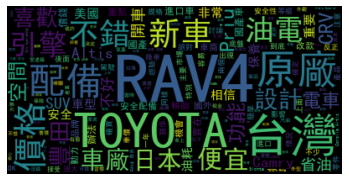

In [107]:
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
seg_list=" ".join('%s' %id for id in seg)
wordcloud = WordCloud(font_path='2019_nlp/work/Text_wordcloud/fonts/SimHei.ttf').generate(seg_list)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [108]:
import time
start_time = time.time()
content = open('Rav4Done.txt', 'rb').read()
#斷詞，選出100個主題
tags = jieba.analyse.extract_tags(content,topK=100,withWeight=True)
print("--- spend %s seconds ---" % (time.time() - start_time))

--- spend 32.395161151885986 seconds ---


In [109]:
tags

[('RAV4', 0.17674109259166174),
 ('台灣', 0.06787699579770247),
 ('原廠', 0.05628662754883431),
 ('配備', 0.04071056731397052),
 ('價格', 0.0363341212117008),
 ('油電', 0.03209594195057422),
 ('TOYOTA', 0.03146472376274685),
 ('2.0', 0.031212236487615907),
 ('Toyota', 0.03021431059066979),
 ('2.5', 0.028813607373871928),
 ('系統', 0.028789560966716598),
 ('進口', 0.028687363736306454),
 ('空間', 0.027677414635782674),
 ('引擎', 0.027357369333400352),
 ('油耗', 0.025666295590116302),
 ('保養', 0.025200634698783878),
 ('不錯', 0.02515254188447322),
 ('10', 0.024046407155328124),
 ('新車', 0.023757850269464188),
 ('豐田', 0.0206258057374827),
 ('喜歡', 0.020517596905283722),
 ('安全', 0.020448225524700474),
 ('rav4', 0.019243137326051332),
 ('車廠', 0.01879226719188893),
 ('汽車', 0.018684058359689955),
 ('設計', 0.01852174511139149),
 ('萬元', 0.01837746666845952),
 ('後座', 0.01837746666845952),
 ('國產', 0.0180167705611296),
 ('日本', 0.017941519110182592),
 ('Hybrid', 0.01766809765737734),
 ('電車', 0.017475726400134714),
 ('美國', 0

In [22]:
import time
start_time = time.time()
content = open('AltisDone.txt', 'rb').read()
#斷詞，選出100個主題
tags_rank = jieba.analyse.textrank(content,topK=100,withWeight=False)
print("--- spend %s seconds ---" % (time.time() - start_time))

--- spend 6078.683092594147 seconds ---


In [23]:
tags_rank

['台灣',
 '引擎',
 '油耗',
 '日本',
 '省油',
 '保固',
 '品牌',
 '相信',
 '分享',
 '交車',
 '改款',
 '造成',
 '加油',
 '神車',
 '里程',
 '汽油',
 '成本',
 '操控',
 '注意',
 '功能',
 '上市',
 '加速',
 '增加',
 '天窗',
 '不想',
 '速度',
 '好看',
 '影音',
 '妥善',
 '領牌',
 '公升',
 '福特',
 '避震器',
 '接受',
 '柴油',
 '行李箱',
 '扭力',
 '自排',
 '配件',
 '台北',
 '保桿',
 '座椅',
 '代表',
 '故障',
 '防水',
 '小心',
 '效果',
 '山路',
 '表示',
 '得到',
 '能力',
 '性能',
 '降低',
 '玻璃',
 '黑色',
 '控制',
 '改善',
 '合理',
 '可惜',
 '位置',
 '工作',
 '角度',
 '提升',
 '店家',
 '值得',
 '符合',
 '隔音',
 '踏板',
 '科技',
 '老車',
 '方面',
 '白色',
 '不行',
 '乘客',
 '定位',
 '懂車',
 '奇怪',
 '避震',
 '旅車',
 '召回',
 '特仕',
 '回覆',
 '啟動',
 '像是',
 '新款',
 '回去',
 '肯定',
 '感受',
 '耗油',
 '看車',
 '漏油',
 '事件',
 '方法',
 '程度',
 '乙式',
 '折扣',
 '失控',
 '搭配',
 '置物',
 '熄火']

In [24]:
import time
start_time = time.time()
tags_part= jieba.analyse.extract_tags(content,topK=100,withWeight=True, allowPOS=('a', 'ad', 'an', 'ag','al','n'))
# a 形容词 
# ad 副形词 
# an 名形词 
# ag 形容词性语素 
# al 形容词性惯用语
# 名词
print("--- spend %s seconds ---" % (time.time() - start_time))

--- spend 5975.282372951508 seconds ---


In [25]:
tags_part

[('引擎', 0.2651407938358888),
 ('油耗', 0.23111485846817728),
 ('省油', 0.16166305339181886),
 ('安全', 0.15886302334756588),
 ('便宜', 0.10871421588553588),
 ('交車', 0.10083421805489907),
 ('里程', 0.06993755270504899),
 ('領牌', 0.06767423529991085),
 ('神車', 0.0651227125072808),
 ('影音', 0.062465386229139296),
 ('避震器', 0.05797892213021943),
 ('品牌', 0.05245300768394317),
 ('汽油', 0.0495822547410098),
 ('扭力', 0.04892137227604561),
 ('特仕', 0.046329765784640244),
 ('天窗', 0.04476079196221407),
 ('保桿', 0.03937195940012215),
 ('行李箱', 0.03668458867024356),
 ('容易', 0.03574067672397383),
 ('老車', 0.033827304100753),
 ('旅車', 0.03352308407547788),
 ('配件', 0.033118507001894434),
 ('乙式', 0.03292445757413006),
 ('重要', 0.03279048604760853),
 ('避震', 0.03277065375513754),
 ('功能', 0.03198410729623404),
 ('座椅', 0.03184316583568348),
 ('成本', 0.031192499311075005),
 ('踏板', 0.029514277492145562),
 ('耗油', 0.029114554449731243),
 ('很大', 0.028765489940665624),
 ('柴油', 0.02787175953526475),
 ('故障', 0.02782669875973502),
 ('清楚'

In [28]:
df_altis

article_sub  \
0                               #情報 #TOYOTA女神張景嵐ALTIS試駕會   
1                                   Toyota Altis 燃油泵召回紀錄   
2      ［分享］這才是負責任的大公司，果然第一名沒讓人失望！「自主安全性召回」來敲門~Altis C...   
3                                        歐規GR Sport神A亮相！   
4                                  想詢問二手 Toyota Altis 價格   
...                                                  ...   
26841       台灣依舊是車美仕主機！日規新年式Toyota RAV4導入Display Audio系統   
26842                                 Toyota Yaris 第四代改款   
26844                                  戰力分析，5代Rav4表現可圈可點   
26851          【採訪】Toyota 小改款 Hilux 145 萬元正式上市，猛漢皮卡全面進化！   
26852                           2019 外媒測試 RAV4 這台真不是普通的神   

                                            main_content  \
0      雖然ALTISHYBRID上市已經1年多，但好像去看看張景嵐也很不錯啦哈哈哈😂報名連結：y2...   
1      沒想到我也中獎了施工整個過程大約一個小時更換完第一次發動會發動不順是正常的順便做20000公...   
2      如題，和泰貼心地主動來函通知，預約也很順利！又可以放鬆心情去喝咖啡了！~對象有國產Altis...   
3      歐規版並未對底盤進行升級，動力選擇有1.6汽油及1.8油電，而台版有針對懸吊進行調整；歐規外...   
4      最近想入手ToyotaAltis想請問201311代經典版里程11萬7公里想問以這台車價個差...   
...                                                  ...   
26841  又是車美仕...又是車美仕...看得到吃不到心情真差....------日本Toyota率先...   
26842                請問這台會在台灣上市嗎？ToyotaYaris第四代改款1763821   
26844                     三強評比，舒適乘適性極佳噪音難免果然表現不錯，難怪銷售第一。   
26851  Toyota原廠於今年六月所推出的小改款Hilux於今日正式在台上市，採取單一車系編成，正式...   
26852  cs7PSpIMJYk?t=469四項有三項倒數第1，１項倒數第２在台灣賣的好真奇怪，還是說...   

                                             all_replies  
0                                                    nan  
1      覺得你的牌才是亮點誒|昏倒|我還沒收到通知單，但昨天剛3萬定保原廠不會順便處裡..下次還要再...  
2      回廠後專員會跟你說碟盤磨損了，該換新的了，輪胎也磨損了建議更換，再加裝個奈米空氣濾清器，這個...  
3      甚麼規都一樣，我們還是只有台規能買!|鋁圈？？？難啦~~和泰這些「無基本美學」的高層太多了看...  
4      經典版當初牌價：68.9萬.若打折個價，領牌+保險湊成整數約莫：65萬左右.買新車會談的，當...  
...                                                  ...  
26841  車美仕是自己的啊想"導入"難啊...把握當下、愛要即時；勿以惡小而為之、勿以善小而不為。|車...  
26842  台灣跟亞規，不跟日歐規，目前亞規的大改款還遙遙無期。|完全不可能，除非和泰這些人全部下台不然...  
26844  價格都一樣當然選進口車Rav4還是休旅車首選|品牌，進口，配備，價格，所以賣的最好。|我怎麼...  
26851  好帥，又有ACC。有被打動...攝影人的份量來自於作品\r而不是相機與鏡頭\rMyFlick...  
26852  認真回答：我們原本會以為，應該以車子開起來的感受好壞，來決定是否買這部車。可是事實上，在台灣...  

[16019 rows x 3 columns]

In [32]:
df_altis['new'] = df_altis['article_sub']+df_altis['main_content']+df_altis['all_replies']

In [36]:
df_altis.loc[:,['new']].iloc[0]

new    #情報 #TOYOTA女神張景嵐ALTIS試駕會雖然ALTISHYBRID上市已經1年多，但...
Name: 0, dtype: object

In [110]:
e  = pd.DataFrame(seg, columns=['content'])

In [111]:
e

content
0     活動 2020 RAV4 DAY 第一屆 全國 會師 RAV4 DAY 會師 親愛 RAV4...
1     Toyota RAV4 2.0 隔熱紙 推薦 及放菜 空間 62 因還 牽車 時隔 熱要 推...
2     TOYOTA RAV4 台灣 會進 2.0 油電 引擎 油價 下降 社團 購車 推薦 電車 ...
3     徵求 2020 Toyota RAV4 旗艦版 徵求 空車 台北 2.0 汽油旗艦 借版 大...
4     RAV4 87000 多公里 就換 燃油 濾清器 各位朋友 上來 沒想到 該廠 效率 廠長 ...
...                                                 ...
4546  進口車 請進 RAV4 PREVIA 拿到 貨物稅 證明書 給的 貨物稅 證明書 無紙化 作...
4547  TOYATA 倒車 影像 先進 RAV4 裝車 美仕 車機 包含 DVD 數位 電視 導航 ...
4548  RAV 美國 運回 台灣 確定 這裡 發問 合適 合適 麻煩 版大 通知 一聲 自行 搬移 ...
4549  Toyota 全新 界定 Urban Cruiser 預計 正式 發表 實車 外媒 繪製 預...
4550  10 上市 車市 震撼 Toyota Corolla Cross Toyota Coroll...

[4551 rows x 1 columns]

In [112]:
f = pd.DataFrame(['Toyota_Rav4'] *4551, columns=['type'])

In [113]:
f

type
0     Toyota_Rav4
1     Toyota_Rav4
2     Toyota_Rav4
3     Toyota_Rav4
4     Toyota_Rav4
...           ...
4546  Toyota_Rav4
4547  Toyota_Rav4
4548  Toyota_Rav4
4549  Toyota_Rav4
4550  Toyota_Rav4

[4551 rows x 1 columns]

In [114]:
i = pd.concat([e,f], axis=1)

In [50]:
g

content          type
0      情報 TOYOTA 女神 張景嵐 ALTIS 試駕會 ALTIS HYBRID 上市 張景嵐...  Toyota_Altis
1      Toyota Altis 燃油泵 召回 紀錄 沒想到 中獎 施工 整個 過程 小時 更換 第...  Toyota_Altis
2      這才 負責 第一名 失望 自主 安全性 召回 敲門 Altis Camry Alphard ...  Toyota_Altis
3      詢問 二手 Toyota Altis 價格 入手 Toyota Altis 201311 經...  Toyota_Altis
4      2006 Altis 排檔 膠套 更換 家裡 2006 Altis 排檔 卡卡 通病 排檔 ...  Toyota_Altis
...                                                  ...           ...
10812  二代 Wish CVT 無段變速系統 研發 Valvematic 可變 汽門 揚程 科技 V...  Toyota_Altis
10813  TOYOTA 服務 實在 ALTIS 桃園 南部 便宜 業代有 我速 控鎖 速控鎖 兩光 兩...  Toyota_Altis
10814  改裝 避震 版上 昨日 換了 BC 避震器 換完 過彎 明顯 效果 車速 稍快 過彎 後輪 ...  Toyota_Altis
10815  10 上市 車市 震撼 Toyota Corolla Cross Toyota Coroll...  Toyota_Altis
10816  間諜 臺灣 環保 標章 露餡 國產 Toyota Corolla Cross 無偽裝 首度 ...  Toyota_Altis

[10817 rows x 2 columns]

In [74]:
h

content          type
0     1.5L 4WD Toyota Yaris Cross 日本 確認 發表 預售 日本 預售 ...  Toyota_Yaris
1     小休 細節 揭露 日規 Toyota Yaris Cross 準備 登場 總算 公開 細節 ...  Toyota_Yaris
2     yaris 駕駛座 異音 先進 聽得出來 豆豆 聲是 發出 影像 儀表 上方 速度 需快 聲...  Toyota_Yaris
3     2007 11 公里 yaris 15 買來 換掉 focus mk2 200711 公里 ...  Toyota_Yaris
4     有如 一號 Corolla Cross 日規 Toyota Yaris 小休 發表 Toyo...  Toyota_Yaris
...                                                 ...           ...
2608  求助 車美仕 RAV4 引擎 桿嗎 父親 RAV4 幾天 原廠 保養 技師 鼓吹 他裝 引擎...  Toyota_Yaris
2609  VIOS 女王 國王 月剛 退休 幾天 舊車 福特 全壘打 報廢 幾天 打算 新車 有空時 ...  Toyota_Yaris
2610  TE RC EL 顏色 人大 幫忙 銀色 TE RC EL 顏色 打算 給他 全車 重點 不...  Toyota_Yaris
2611  台灣 Toyota 2002 Celica 美國 以外 有位 同學 白色 2002Celic...  Toyota_Yaris
2612  2008 Altis 星河 vs 2009 Altis 極光 顏色 有個 2008 Alti...  Toyota_Yaris

[2613 rows x 2 columns]

In [115]:
i

content         type
0     活動 2020 RAV4 DAY 第一屆 全國 會師 RAV4 DAY 會師 親愛 RAV4...  Toyota_Rav4
1     Toyota RAV4 2.0 隔熱紙 推薦 及放菜 空間 62 因還 牽車 時隔 熱要 推...  Toyota_Rav4
2     TOYOTA RAV4 台灣 會進 2.0 油電 引擎 油價 下降 社團 購車 推薦 電車 ...  Toyota_Rav4
3     徵求 2020 Toyota RAV4 旗艦版 徵求 空車 台北 2.0 汽油旗艦 借版 大...  Toyota_Rav4
4     RAV4 87000 多公里 就換 燃油 濾清器 各位朋友 上來 沒想到 該廠 效率 廠長 ...  Toyota_Rav4
...                                                 ...          ...
4546  進口車 請進 RAV4 PREVIA 拿到 貨物稅 證明書 給的 貨物稅 證明書 無紙化 作...  Toyota_Rav4
4547  TOYATA 倒車 影像 先進 RAV4 裝車 美仕 車機 包含 DVD 數位 電視 導航 ...  Toyota_Rav4
4548  RAV 美國 運回 台灣 確定 這裡 發問 合適 合適 麻煩 版大 通知 一聲 自行 搬移 ...  Toyota_Rav4
4549  Toyota 全新 界定 Urban Cruiser 預計 正式 發表 實車 外媒 繪製 預...  Toyota_Rav4
4550  10 上市 車市 震撼 Toyota Corolla Cross Toyota Coroll...  Toyota_Rav4

[4551 rows x 2 columns]

In [118]:
type_3 = pd.concat([g,h,i], ignore_index= 1)

In [119]:
type_3


content          type
0      情報 TOYOTA 女神 張景嵐 ALTIS 試駕會 ALTIS HYBRID 上市 張景嵐...  Toyota_Altis
1      Toyota Altis 燃油泵 召回 紀錄 沒想到 中獎 施工 整個 過程 小時 更換 第...  Toyota_Altis
2      這才 負責 第一名 失望 自主 安全性 召回 敲門 Altis Camry Alphard ...  Toyota_Altis
3      詢問 二手 Toyota Altis 價格 入手 Toyota Altis 201311 經...  Toyota_Altis
4      2006 Altis 排檔 膠套 更換 家裡 2006 Altis 排檔 卡卡 通病 排檔 ...  Toyota_Altis
...                                                  ...           ...
17976  進口車 請進 RAV4 PREVIA 拿到 貨物稅 證明書 給的 貨物稅 證明書 無紙化 作...   Toyota_Rav4
17977  TOYATA 倒車 影像 先進 RAV4 裝車 美仕 車機 包含 DVD 數位 電視 導航 ...   Toyota_Rav4
17978  RAV 美國 運回 台灣 確定 這裡 發問 合適 合適 麻煩 版大 通知 一聲 自行 搬移 ...   Toyota_Rav4
17979  Toyota 全新 界定 Urban Cruiser 預計 正式 發表 實車 外媒 繪製 預...   Toyota_Rav4
17980  10 上市 車市 震撼 Toyota Corolla Cross Toyota Coroll...   Toyota_Rav4

[17981 rows x 2 columns]

In [122]:
corpus = type_3['content'].tolist()

In [123]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()

In [126]:
labels = type_3['type'].tolist()

In [129]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
labels = labelencoder.fit_transform(labels)

In [133]:
import numpy as np
np.max(labels)

2

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size = 0.20, random_state = 0)

In [136]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [137]:
y_pred = classifier.predict(X_test)

In [138]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [139]:
cm

array([[2091,   27,   32],
       [ 503,  361,   76],
       [ 359,   14,  134]], dtype=int64)

In [151]:
from sklearn.svm import SVC
clf = SVC(kernel = 'rbf', random_state = 0)
clf.fit(X_train, y_train)
y_pred2 = clf.predict(X_test)

In [152]:
cm = confusion_matrix(y_test, y_pred2)

In [153]:
cm

array([[2081,   42,   27],
       [  87,  841,   12],
       [  71,   11,  425]], dtype=int64)

In [156]:
type_3.to_csv('type3.csv', index = False, encoding = 'utf-8')

In [161]:
print(trainX, testX, trainY, testY)

[[0 1 0 ... 0 1 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [[ 0  1  0 ... 16  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]] [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]] [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [163]:
model = Sequential()
model.add(Dense(output_dim=10, input_dim=1500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(output_dim=3, input_dim=10, activation='softmax'))
model.summary()

C:\Users\Big data\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1500, activation="relu", units=10)`
  
C:\Users\Big data\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=10, activation="softmax", units=3)`
  after removing the cwd from sys.path.


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                15010     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 15,043
Trainable params: 15,043
Non-trainable params: 0
_________________________________________________________________


In [172]:
from keras.optimizers import Adam
# Compile model
EPOCHS = 40
INIT_LR = 1e-3
BS = 256
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,
    metrics=["accuracy"])

In [173]:
H = model.fit(x=trainX, y=trainY, batch_size=BS, epochs=EPOCHS, verbose=1, validation_data=(testX, testY))

Train on 14384 samples, validate on 3597 samples
Epoch 1/40
14384/14384 [==============================] - 0s 34us/step - loss: 0.0547 - accuracy: 0.9784 - val_loss: 0.3327 - val_accuracy: 0.9491
Epoch 2/40
14384/14384 [==============================] - 0s 25us/step - loss: 0.0521 - accuracy: 0.9787 - val_loss: 0.3150 - val_accuracy: 0.9505
Epoch 3/40
14384/14384 [==============================] - 0s 24us/step - loss: 0.0494 - accuracy: 0.9794 - val_loss: 0.3135 - val_accuracy: 0.9480
Epoch 4/40
14384/14384 [==============================] - 0s 25us/step - loss: 0.0498 - accuracy: 0.9789 - val_loss: 0.3160 - val_accuracy: 0.9477
Epoch 5/40
14384/14384 [==============================] - 0s 24us/step - loss: 0.0511 - accuracy: 0.9792 - val_loss: 0.3230 - val_accuracy: 0.9472
Epoch 6/40
14384/14384 [==============================] - 0s 25us/step - loss: 0.0478 - accuracy: 0.9798 - val_loss: 0.3225 - val_accuracy: 0.9483
Epoch 7/40
14384/14384 [==============================] - 0s 25us/ste

In [180]:
pred= model.predict(testX)
pred[0]

array([1., 0., 0.], dtype=float32)